# Binary Classification with Logistic Regression: The Titanic Dataset

This dataset was made avaliable by Kaggle. It is widely used for educational purposes. Our goal is to optimize the given features for each passenger of the Titanic and fit our logistic regression model to these features, in order to predict if a passenger of the Titanic has survived or not. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

SEED = 42
np.random.seed(SEED)


df = pd.read_csv('../dataset/Titanic-Dataset.csv')
df = df.dropna()
df.head()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


## Data Exploration
First, we will explore some statistics from survivors.

In [12]:
df_surv = df[df['Survived'] == 1]

### Categorical Variables

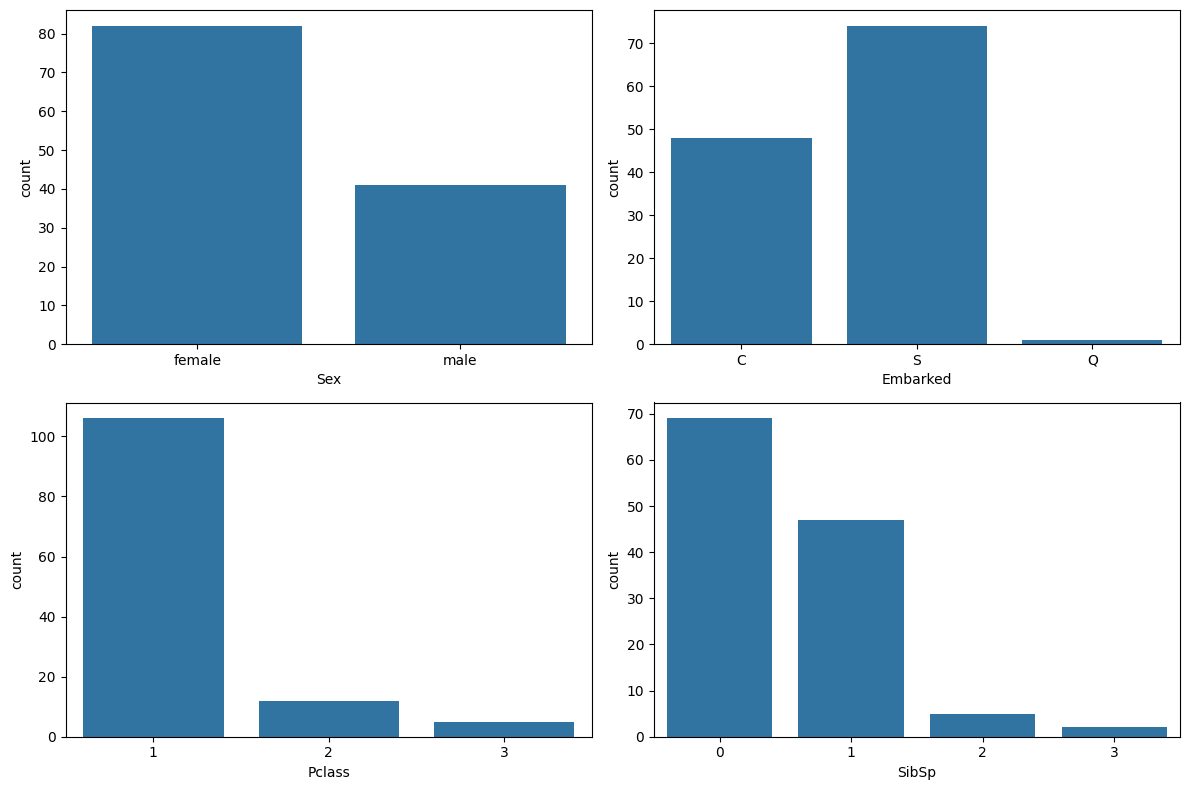

In [13]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.countplot(data=df_surv, x='Sex')

plt.subplot(2, 2, 2)
sns.countplot(data=df_surv, x='Embarked')

plt.subplot(2, 2, 3)
sns.countplot(data=df_surv, x='Pclass')

plt.subplot(2, 2, 4)
sns.countplot(data=df_surv, x='SibSp')

plt.tight_layout()
plt.show()

## Continuous Variables

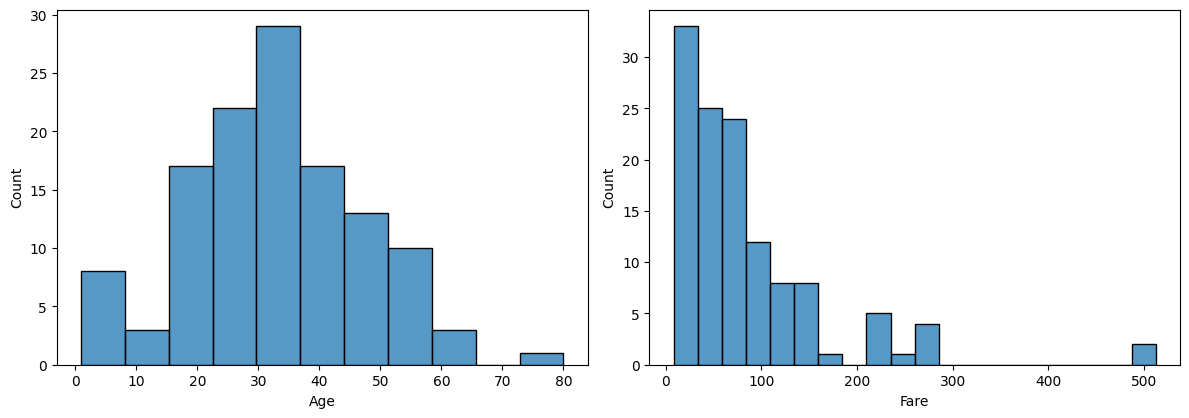

In [14]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.histplot(data=df_surv, x='Age')

plt.subplot(2, 2, 2)
sns.histplot(data=df_surv, x='Fare')


plt.tight_layout()
plt.show()

## Correlations

<Axes: >

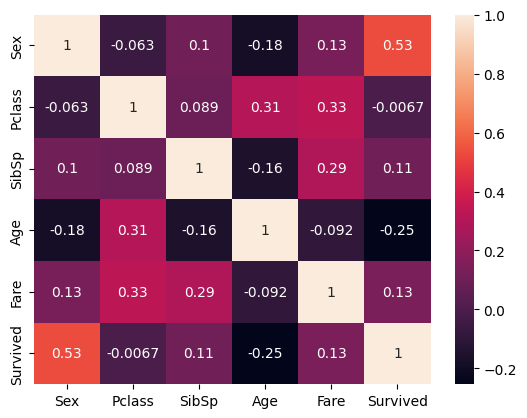

In [15]:
df['Sex'] = np.array([1 if s == 'female' else 0 for s in df['Sex']])
df['Pclass'] = np.array([1 if pclass == 1 else 0 for pclass in df['Pclass']])
df = df[['Sex', 'Pclass', 'SibSp', 'Age', 'Fare', 'Survived']]
corr = df.corr()
sns.heatmap(corr, annot=True)

In [16]:
df = df[['Sex', 'SibSp', 'Age', 'Fare', 'Survived']]

## Load Model

In [17]:
import os
import sys

current_dir = os.getcwd()
model_dir = os.path.join(current_dir, '../ml_model')
sys.path.append(model_dir)

from logistic_regressor import LogisticRegressor

model = LogisticRegressor(regularization='None')

## Prepare Dataset

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from math import floor

X = np.asarray(df[['Sex', 'SibSp', 'Age', 'Fare']])
y = np.asarray(df['Survived'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=.2)
y_train, y_test = train_test_split(y, test_size=.2)

X_train, X_test = X_train.T, X_test.T
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

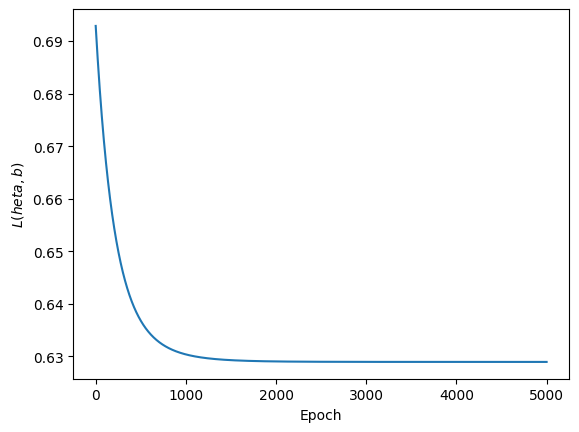

In [19]:
model.fit(X_train, y_train)    

In [20]:
print(f'Accuracy: {np.round(100 * model.accuracy(X_test, y_test), 2)} %')
print(f'Precision: {np.round(100 * model.precision(X_test, y_test), 2)}%')
print(f'Recall: {np.round(100 * model.recall(X_test, y_test), 2)} %')
print(f'F1-score: {np.round(100 * model.f1_score(X_test, y_test), 2)} %')

Accuracy: 72.97 %
Precision: 78.79%
Recall: 89.66 %
F1-score: 83.87 %


In a more comprehensive analysis of the metrics, it is important to note that although the accuracy stands at around 73%, other indicators point to a more promising performance. Precision (78.79%) shows that nearly 79% of positive classifications are correct, and recall (89.66%) demonstrates that the model identifies most of the positive cases. The F1-score of 83.87% consolidates these two metrics, indicating a good balance between precision and recall.

However, the relatively low accuracy suggests that the model may not be adequately capturing certain data patterns—possibly due to imbalanced classes or underrepresentative features. Refining feature engineering through more sophisticated transformations, the inclusion of contextual variables, and other adjustments could improve the model’s capacity to differentiate classes. Coupled with strategies like gathering higher-quality data, employing sampling techniques, tuning hyperparameters, and performing thorough error analyses, these enhancements could boost overall performance and make the classifier more suited to the problem.